# K-Nearest-Neighbors

👇 Load the `houses_clean.csv` dataset located in the `data` folder  
Or you can load it directly from this URL: [https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_clean.csv](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_clean.csv).  

The dataset description can be found [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt).

In [1]:
# YOUR CODE HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_clean.csv'

df = pd.read_csv(url)
df.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir,SalePrice
0,0.380070,0.375,0.333333,0.500,1,208500
1,-0.312090,0.375,0.333333,0.875,1,181500
2,0.497489,0.375,0.333333,0.500,1,223500
3,0.390885,0.375,0.333333,0.500,1,140000
4,1.134029,0.500,0.333333,0.500,1,250000


💡 Most features are already preprocessed (scaled with normalization), as you did during the Data Preparation day  

💡 One feature, `GrLiveArea`, is not normalized. We keep it that way to see the impact of its normalization on our model performance later on  

👇 You can easily see this with descriptive statistics, check the min and max    

In [2]:
df.describe()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.078410,0.358305,0.348858,0.571918,0.934932,180921.195890
std,0.813952,0.101972,0.073446,0.139100,0.246731,79442.502883
min,-2.263422,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,-0.516802,0.250000,0.333333,0.500000,1.000000,129975.000000
50%,0.000000,0.375000,0.333333,0.500000,1.000000,163000.000000
75%,0.483198,0.375000,0.333333,0.625000,1.000000,214000.000000
max,6.455002,1.000000,1.000000,1.000000,1.000000,755000.000000


# Default KNN

🎯 The task is to predict the price of houses (`SalePrice`) with all the features.

👇 Use cross validation to evaluate a default [KNNRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) on such a task.  
❓ What is the proportion of the variance in `SalePrice` that is explained by the features?  
Save your answer in a variable named `base_knn_score`.

<details>
<summary> 💡 Hint </summary>
    <br>
    ℹ️ The proportion of the variance in the dependent variable that is explained by the independent variables is the R2 score.
</details>

In [9]:
# YOUR CODE HERE
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate

X = df[['GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'OverallCond', 'CentralAir']]
y = df['SalePrice']

model = KNeighborsRegressor()

cv = cross_validate(model, X, y, cv=10)

base_knn_score = cv['test_score'].mean()

### 🧪 Check your code

In [10]:
from nbresult import ChallengeResult

result = ChallengeResult('default_score',
                         score = base_knn_score)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-7.1.3, pluggy-1.0.0 -- /Users/bita/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bita/code/lewagon/data-knn/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_default_score.py::TestDefault_score::test_score PASSED              [100%]

============================== 1 passed in 0.19s ===============================


💯 You can commit your code:

git add tests/default_score.pickle

git commit -m 'Completed default_score step'

git push origin master



# Scale sensitivity

KNNs and distance-based algorithms can be extremely sensitive to the scale of the features. 

👇 Rescale the feature set within an **exact common range**, and save it under a variable named `X_rescaled`  
Then, evaluate a model on the rescaled features and save its score under variable name `rescaled_score`.

<details>
<summary> 💡 Hint </summary>
    
`MinMaxScaler()`

Even though only `GrLiveArea` needs to be normalized, using the MinxMaxScaler on all your features is fine  
    
Indeed, Min-Max Scaling is an [idempotent](https://en.wikipedia.org/wiki/Idempotence) transformation: if $X_{max}=1$ and $X_{min}=0$, then $X = \frac{X - X_{min}}{X_{max} - X_{min}}$
</details>


In [15]:
# YOUR CODE HERE
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_rescaled = scaler.transform(X)


In [16]:
cv2 = cross_validate(model, X_rescaled, y, cv=10)
rescaled_score = cv2['test_score'].mean()

rescaled_score

0.6507204541302893

In [17]:
base_knn_score

0.6078351011870936

👉 The R2 score should have increased!

💡 It is preferable for features to be in an exact common range when modeling distance-based algorithms.  
However, it does not always guarantee a better score.  
It is a trial and error process.

### 🧪 Check your code

In [18]:
from nbresult import ChallengeResult

result = ChallengeResult('scale_sensitivity',
                         base_score = base_knn_score,
                         rescaled_features = X_rescaled,
                         rescaled_score = rescaled_score)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-7.1.3, pluggy-1.0.0 -- /Users/bita/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bita/code/lewagon/data-knn/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_scale_sensitivity.py::TestScale_sensitivity::test_rescaled_features PASSED [ 50%]
test_scale_sensitivity.py::TestScale_sensitivity::test_score_inscrease PASSED [100%]

============================== 2 passed in 0.17s ===============================


💯 You can commit your code:

git add tests/scale_sensitivity.pickle

git commit -m 'Completed scale_sensitivity step'

git push origin master



# Optimizing $k$

👇 Fine tune the parameter K (using the parameter `n_neighbors`) of a KNNRegressor on the rescaled features. Plot the evolution of the score as K increases from 1 until 25.

In [29]:
# YOUR CODE HERE
score = []
neighbors = []

for k in range(1, 25):
    model = KNeighborsRegressor(n_neighbors=k)

    cv3 = crosst_validate(model, X_rescaled, y, cv=10)
    score.append(cv3['test_score'].mean())
    neighbors.append(k)

❓ Which value of K produces the best performance? Save your answer under variable name `best_k`.

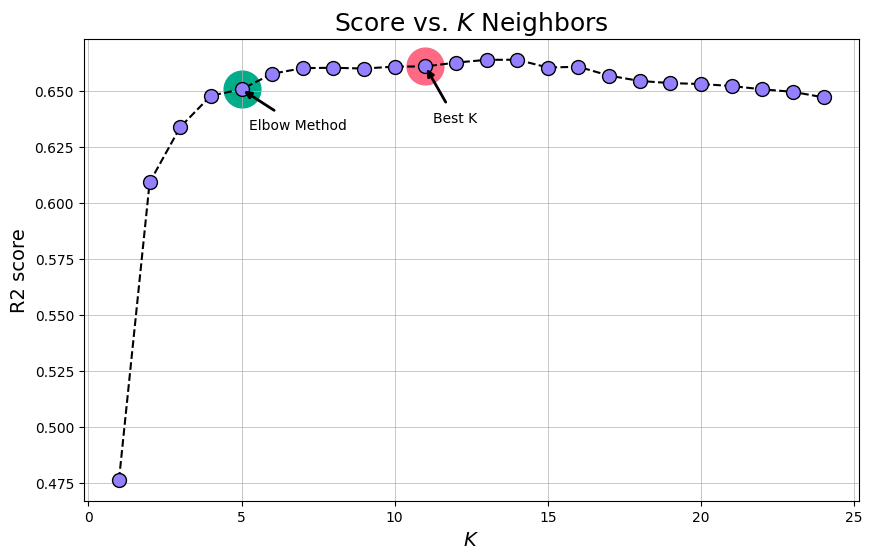

In [36]:
# YOUR CODE HERE
# Plot the evolution of the score below

with plt.style.context('seaborn-deep'):
    # figsize
    plt.figure(figsize=(10,6))
    # getting axes
    ax = plt.gca()
    # plotting
    ax.plot(range(1,25),score,color='black', linestyle='dashed', marker='o',markerfacecolor='#947FFF', markersize=10)
    # more
    ax.set_title('Score vs. $K$ Neighbors', fontsize = 18)
    ax.set_xlabel('$K$', fontsize = 14)
    ax.set_ylabel('R2 score', fontsize = 14)
    ax.grid(axis="x",linewidth=0.5)
    ax.grid(axis="y",linewidth=0.5)
    # best K
    # focusing
    ax.scatter(5,score[5-1],c='#00ad8b',s=700)
    ax.scatter(11,score[11-1],c='#ff6984',s=700)
    
    # annotate
    ax.annotate("Elbow Method", 
                xy=(5,score[5-1]),
                xytext=(5+0.25,score[6-1]-0.025), 
                arrowprops=dict(arrowstyle='-|>',
                                fc="k",
                                ec="k",
                                lw=2),
                bbox=dict(pad=5, facecolor="none", edgecolor="none")
               )
    
    ax.annotate("Best K", 
            xy=(11,score[11-1]),
            xytext=(11+0.25,score[11-1]-0.025), 
            arrowprops=dict(arrowstyle='-|>',
                            fc="k",
                            ec="k",
                            lw=2),
            bbox=dict(pad=5, facecolor="none", edgecolor="none")
           )

    
    plt.show()

<details>
<summary> 👉 Solution 👈</summary>
    
By looking at your graph, you should see that the score stops increasing around k = 5 and the maximum score is reached for k = 11.

</details>



❓ What is you interpretation of the poor performance of the model for values $k$ < 5?

<details>
<summary> 👉 Solution 👈</summary>
    
When K is too small, the model will tend to overfit to the training set. It will focus on too few points to be able to generalize well. Increasing K will give the model more examples to base its predictions on.

</details>



In [43]:
best_k = 11

### 🧪 Check your code

In [44]:
from nbresult import ChallengeResult

result = ChallengeResult('optimal_k',
                         optimal_k = best_k)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-7.1.3, pluggy-1.0.0 -- /Users/bita/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bita/code/lewagon/data-knn/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_optimal_k.py::TestOptimal_k::test_optimal_K_around_10 PASSED        [100%]

============================== 1 passed in 0.03s ===============================


💯 You can commit your code:

git add tests/optimal_k.pickle

git commit -m 'Completed optimal_k step'

git push origin master



# Overfitting a KNN 

💡 When the parameter K of KNNs is too small, there is a risk of overfitting the training set and not being able to generalize well. 

👇 Plot the learning curves of a KNN with parameter K=2.

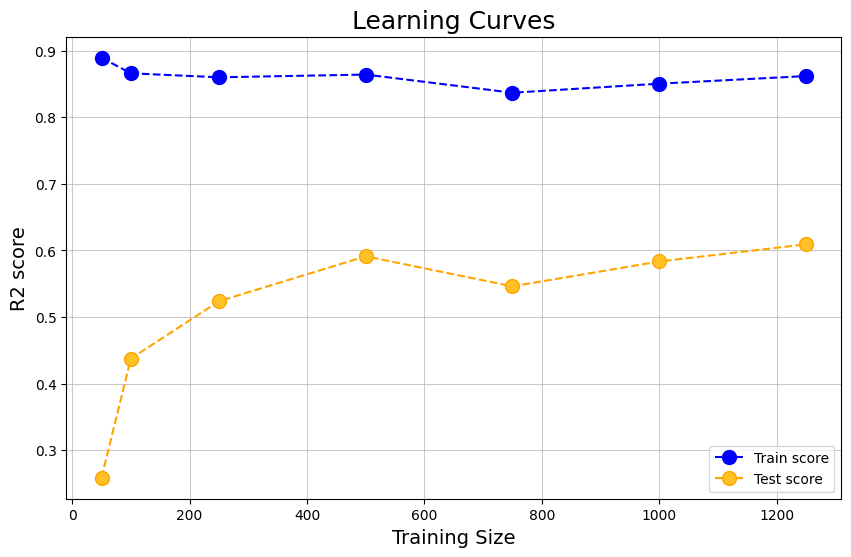

In [70]:
# YOUR CODE HERE
from sklearn.model_selection import learning_curve




train_sizes, train_scores, test_scores = learning_curve(estimator = KNeighborsRegressor(n_neighbors=2),
                                                              X = X_rescaled, 
                                                              y = y, 
                                                              train_sizes = [50,100,250,500,750,1000,1250], 
                                                              cv = 10,
                                                              scoring = 'r2')

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

with plt.style.context('seaborn-deep'):
    # figsize
    plt.figure(figsize=(10,6))
    # getting axes
    ax = plt.gca()
    # plotting
    ax.plot(train_sizes, train_scores_mean, label = 'Train score',color='blue', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
    ax.plot(train_sizes, test_scores_mean, label = 'Test score',color='orange', linestyle='dashed', marker='o',markerfacecolor='#ffc125', markersize=10)
    # more
    ax.set_title('Learning Curves', fontsize = 18)
    ax.set_xlabel('Training Size', fontsize = 14)
    ax.set_ylabel('R2 score', fontsize = 14)
    ax.grid(axis="x",linewidth=0.5)
    ax.grid(axis="y",linewidth=0.5)
    ax.legend(loc="best")
    
    plt.show()

👉 You should observe a high training score, but a low testing score. ⚠️ Overfitting alert ⚠️ This is due to a parameter K that is too low.

# Ideal K

👇 This time, plot the learning curves for the ideal K value you found in the "Optimizing $k$" section.

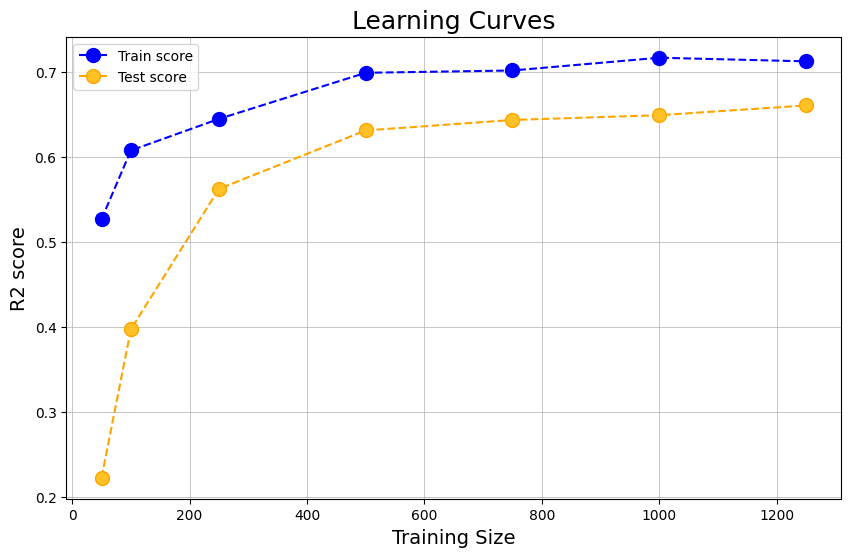

In [71]:
# YOUR CODE HERE



train_sizes, train_scores, test_scores = learning_curve(estimator = KNeighborsRegressor(n_neighbors=11),
                                                              X = X_rescaled, 
                                                              y = y, 
                                                              train_sizes = [50,100,250,500,750,1000,1250], 
                                                              cv = 10,
                                                              scoring = 'r2')

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

with plt.style.context('seaborn-deep'):
    # figsize
    plt.figure(figsize=(10,6))
    # getting axes
    ax = plt.gca()
    # plotting
    ax.plot(train_sizes, train_scores_mean, label = 'Train score',color='blue', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
    ax.plot(train_sizes, test_scores_mean, label = 'Test score',color='orange', linestyle='dashed', marker='o',markerfacecolor='#ffc125', markersize=10)
    # more
    ax.set_title('Learning Curves', fontsize = 18)
    ax.set_xlabel('Training Size', fontsize = 14)
    ax.set_ylabel('R2 score', fontsize = 14)
    ax.grid(axis="x",linewidth=0.5)
    ax.grid(axis="y",linewidth=0.5)
    ax.legend(loc="best")
    
    plt.show()

👉 The curves should be close to converging, which indicates that the model is overfitting less and generalizing better.

💡 There are two key elements to remember when modelling with KNN models:  
    1. Distance-based algorithms are extremely sensitive to the scale of features  
    2. K must be tuned: it controls the tradeoff between performance, generalization, and overfitting

❓ What is the average difference between actual price and predicted price of the optimized KNN model? Compute your answer and save it under variable name `price_error`

<details>
<summary> 💡 Hint </summary>
    
The metric you should calculate is the **Negative Mean Absolute Error (MAE)**.

</details>

In [77]:
# YOUR CODE HERE
cv_6 = cross_validate(estimator = KNeighborsRegressor(n_neighbors=best_k),
                                                              X = X_rescaled, 
                                                              y = y, 
                                                              
                                                              cv = 10,
                                                              scoring = 'neg_mean_absolute_error')

price_error = cv_6['test_score'].mean()
price_error

-30725.01500622665

### 🧪 Check your code

In [78]:
from nbresult import ChallengeResult

result = ChallengeResult('price_error',
                         error = price_error)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-7.1.3, pluggy-1.0.0 -- /Users/bita/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bita/code/lewagon/data-knn/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_price_error.py::TestPrice_error::test_price_error_range PASSED      [100%]

============================== 1 passed in 0.13s ===============================


💯 You can commit your code:

git add tests/price_error.pickle

git commit -m 'Completed price_error step'

git push origin master



# Model Selection

❓ Which of those two models would you chose to perform the task of predicting house prices:
- The KNN model you just tuned
- A Linear Regression model

Save your answer as a string under variable name `best_model` as either "KNN" or "LinearReg".

<details>
<summary> 💡 Hint </summary>
    
To chose either or, you'll have to evaluate the score of a Linear Regression on the same task and compare it to the score of the KNN. Make sure you are comparing the same metrics!!

</details>




In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression

model_7 = LinearRegression()
model_8 = KNeighborsRegressor(n_neighbors=best_k)

cv_linear_model = cross_validate(model_7, X_rescaled, y, cv=10, scoring='r2')

cv_kneighbors = cross_validate(model_8, X_resclaed, y, cv=10, scoring='r2')

linear_model = cv_linear_model['test_score'].mean()
knneighbors = cv_kneighbors['test_score'].mean()

print(f"{linear_model)

💡 When comparing either metric of both models, the KNN model should outperform the Linear Regression. This could be due to its ability to capture non-linear patterns in the data.

### 🧪 Check your code

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('best_model',
                         model = best_model)
result.write()
print(result.check())

# 🏁